<h2>Описание проекта <a class="tocSkip"> </h2>

**Заказчик** — федеральный оператор сотовой связи «Мегалайн».
    
**Цель проекта** - выполнить предобработку данных и изучить их, чтобы понять, какой тариф приносит больше денег.

**Задачи проекта:**
 - осуществить предварительный анализ тарифов на небольшой выборке клиентов;
 - проанализировать поведение клиентов.

**Входные данные:**
*Данные о звонках пользователей (calls.csv):*
- `id` - уникальный идентификатор звонка;
- `call_date` - дата звонка;
- `duration` - продолжительность звонка;
- `user_id` - уникальный идентификатор пользователя.

*Данные о интернет - сессиях пользователей (internet.csv):*
- `id` - уникальный идентификатор сессии;
- `mb_used` - использованно интернет - трафика;
- `session_date` - дата интернет - сессии;
- `user_id` - уникальный идентификатор пользователя.

*Данные о сообщениях пользователей (messages.csv):*
- `id` - уникальный идентификатор сообщения;
- `message_date` - дата отправки сообщения;
- `user_id` - уникальный идентификатор пользователя.

*Информация о имеющихся тарифах (tariffs.csv):*
- `messages_included` - количество сообщений;
- `mb_per_month_included` - количество мегабайт;
- `minutes_included` - количество разговорных минут; 
- `rub_monthly_fee` - стоимость тарифа;
- `rub_per_gb` - цена за ГБ при израсходовании основного пакета интернета;
- `rub_per_message` - цена за сообщение при израсходовании основного пакета сообщений;
- `rub_per_minute` - цена за минуту разговора при израсходовании основного минут;
- `tariff_name` - наименование тарифа.
							
*Информация о пользователях (users.csv):*
- `user_id` - уникальный идентификатор пользователя;
- `age` - возраст пользователя;
- `churn_date` - дата, когда пользователь отказался от услуг оператора;
- `city` - город регистрации пользователя;
- `first_name` - имя;
- `last_name` - фамилия;
- `reg_date` - дата регистрации; 
- `tariff` - название тарифа.                           

**План работ:**

- [Изучение общей информации](#start)
- [Подготовка данных](#preprocessing)
- [Анализ данных и подсчёт выручки](#analyzing)
- [Проверка гипотез](#hypotheses)
- [Вывод](#end)


<a id="introduction"></a>

<a id="start"></a>

### Изучение общей информации

In [57]:
#Импортируем библиотеку pandas
import pandas as pd
#Импортируем библиотеку numpy
import numpy as np
#Импортируем модуль stats из библиотеки scipy
from scipy import stats as st
#Импортируем библиотеку seaborn
import seaborn as sns
#Импортируем модуль pyplot из библиотеки matplotlib
import matplotlib.pyplot as plt


In [58]:
#Сохраним датафрейм со звонками в переменную calls
calls = pd.read_csv('calls.csv')

In [59]:
#Выведем первые 5 строк
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [60]:
#Изучим общую информацию о датасете
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


- В данном датасете отсутствуют пропуски
- Необходимо привести столбец с датой звонка к формату "date"

Text(0.5, 0, 'Продолжительность звонков (мин)')

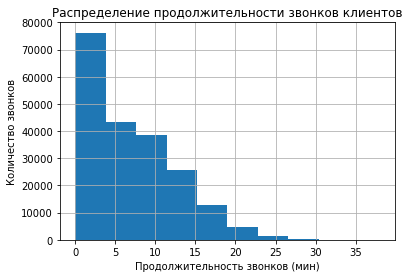

In [61]:
#Изучим распределение продолжительности звонков клиентов
calls['duration'].hist()
plt.title('Распределение продолжительности звонков клиентов')
plt.ylabel('Количество звонков')
plt.xlabel('Продолжительность звонков (мин)')

Большая часть звонков наших пользователей не длится дольше 15-ти минут

In [62]:
#Сохраним датафрейм с интернет - сессиями в переменную sessions
sessions = pd.read_csv('internet.csv')

In [63]:
#Выведем первые 5 строк датафрейма
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [64]:
#Выведем общую информацию о датасете
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


- Пропуски отсутсвуют
- Необходимо привести столбец с датой к типу "date"

Text(0.5, 0, 'Интернет трафик (МБ)')

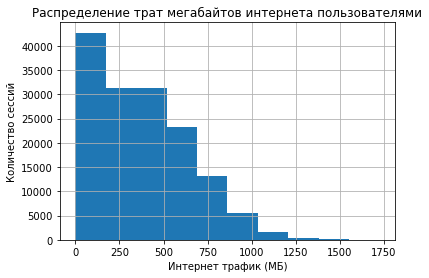

In [65]:
#Изучим распределение трат мегабайтов интернета пользователями
sessions['mb_used'].hist()
plt.title('Распределение трат мегабайтов интернета пользователями')
plt.ylabel('Количество сессий')
plt.xlabel('Интернет трафик (МБ)')

Большинство пользователей не тратят в месяц более 750 МБ интернета

In [66]:
#Сохраним датасет с информацией о сообщениях пользователей в переменную messages
messages = pd.read_csv('messages.csv')

In [67]:
#Выведем первые 5 строк
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [68]:
#Выведем общую информацию о датасете
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [69]:
#Сохраним датасет с информацией о тарифах в переменную tariffs
tariffs = pd.read_csv('tariffs.csv')

In [70]:
#Изучим датасет
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [71]:
#Выведем общую информацию о датасете
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [72]:
#Сохраним датасет с информацией о наших пользователях в переменную users
users = pd.read_csv('users.csv')

In [73]:
#Выведите первые 5 строк датафрейма
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В столбце `churn_date` наблюдаем пропуски

In [74]:
#Выведите основную информацию для датафрейма
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В столбце `churn_date` заполненно только 38 строк, это означает то, что от услуг нашей сотовой связи из выборки в 500 человек отказалось 38

[Описание проекта](#introduction)

<a id="preprocessing"></a>

### Подготовка данных

Приведем столбцы:
- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`

к новому типу с помощью метода `to_datetime()`.

In [75]:
#Обработаем столбец reg_date
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

#Обработаем столбец churn_date
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

#Обработаем столбец call_date
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

#Обработаем столбец message_date
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

#Обработаем столбец session_date
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')

In [76]:
#Округлим значения столбца duration с помощью np.ceil() и приведение типа к int
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [77]:
#Удалим ненужный столбец `Unnamed: 0`, который дублирует индексы
sessions = sessions.drop(columns='Unnamed: 0')

In [78]:
#Создадим столбце month в датафрейме `calls`
calls['month'] = calls['call_date'].dt.month

In [79]:
#Создадим столбец `month` в датафрейме `messages` с номером месяца
messages['month'] = messages['message_date'].dt.month

In [80]:
#Создадим столбец `month` в датафрейме `sessions` с номером месяца 
sessions['month'] = sessions['session_date'].dt.month

In [81]:
#Подсчитаем количество звонков для каждого пользователя по месяцам
calls_per_month = calls.groupby(by=['user_id', 'month']).agg(calls=('duration', 'count'))


In [82]:
#Выведем 30 первых строк на экран
calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

In [83]:
#Подсчитаем израсходованные минуты для каждого пользователя по месяцам
minutes_per_month = calls.groupby(by=['user_id', 'month']).agg(minutes=('duration', 'sum'))

In [84]:
#Выведем первые 30 строк на экран
minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

In [85]:
#Подсчитаем количество отправленных сообщений для каждого пользователя по месяцам
messages_per_month = messages.groupby(by=['user_id', 'month']).agg(messages = ('message_date', 'count'))

In [86]:
#Выведем первые 30 строк на экран
messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

In [87]:
#Подсчитаем потраченные мегабайт для каждого пользователя по месяцам
sessions_per_month = sessions.groupby(by=['user_id', 'month']).agg({'mb_used': 'sum'})

In [88]:
#Выведем первые 30 строк на экран
sessions_per_month.head(30)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

[Описание проекта](#introduction)

<a id="analyzing"></a>

### Анализ данных и подсчёт выручки

In [89]:
#Посчитаем процент людей, расторгнувших договор
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

Расторгли договор 7.6% клиентов из датасета

In [90]:
#Объединим все посчитанные выше значения в один датафрейм `user_behavior`
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [91]:
#Проверим пропуски в таблице `user_behavior` после объединения
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [92]:
#Заполним образовавшиеся пропуски в данных
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

In [93]:
#Переименуем столбец tariff_name на более простое tariff

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [94]:
#Присоединим информацию о тарифах
user_behavior = user_behavior.merge(tariffs, on='tariff')

In [95]:
#Посчитаем количество минут разговора, сообщений и мегабайт, превышающих включенные в тариф
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

In [96]:
#Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец `paid_gb`
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

In [97]:
#Считаем выручку за минуты разговора, сообщения и интернет
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

In [98]:
#Посчитаем помесячную выручку с каждого пользователя, она будет храниться в столбец `total_cost`
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

In [99]:
#Создадим датафрейм stats_df
#Сохраним статистические метрики для каждой пары месяц-тариф
#В одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


--------------------------------------

Распределение среднего количества звонков по видам тарифов и месяцам

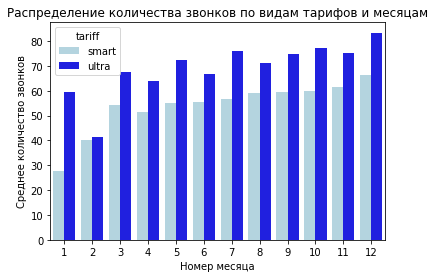

In [100]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

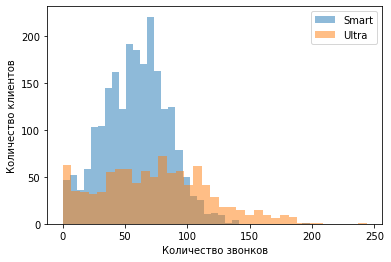

In [101]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

Распределение средней продолжительности звонков по видам тарифов и месяцам

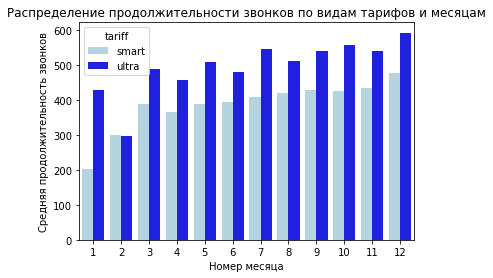

In [102]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

Text(0, 0.5, 'Количество клиентов')

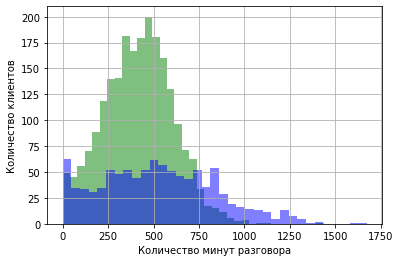

In [103]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue')
plt.xlabel('Количество минут разговора')
plt.ylabel('Количество клиентов')

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

Распределение среднего количества сообщений по видам тарифов и месяцам

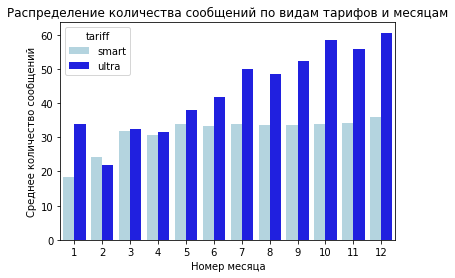

In [104]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

Text(0, 0.5, 'Количество клиентов')

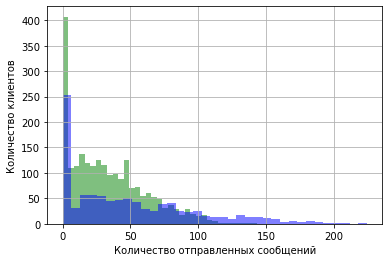

In [105]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue')
plt.xlabel('Количество отправленных сообщений')
plt.ylabel('Количество клиентов')

В среднем количество сообщений пользователи тарифа Ultra отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифак растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

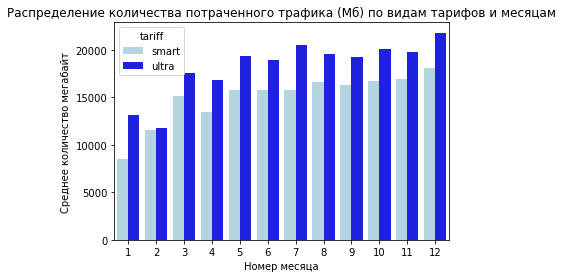

In [106]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra

Text(0, 0.5, 'Количество клиентов')

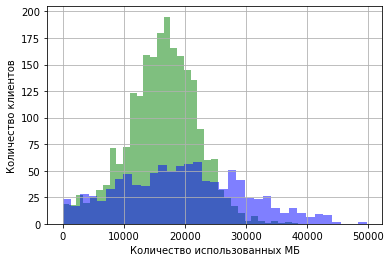

In [107]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue')
plt.xlabel('Количество использованных МБ')
plt.ylabel('Количество клиентов')

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

[Описание проекта](#introduction)

<a id="hypotheses"></a>

### Проверка гипотез

Проверим гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`
alpha = 0.05
```

In [108]:
total_cost_ultra = user_behavior.loc[user_behavior['tariff'] == 'ultra']['total_cost']
total_cost_smart = user_behavior.loc[user_behavior['tariff'] == 'smart']['total_cost']

#Вызовем метод для проверки гипотезы
results = st.ttest_ind(total_cost_ultra, total_cost_smart, equal_var=False)

#Уровень значимости
alpha = 0.05

#Выведем значения p-value на экран
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

4.2606313931076085e-250
Отвергаем нулевую гипотезу


Проверим гипотезу: пользователи из Москвы приносят больше выручки, чем пользователи из других городов;

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

In [109]:
total_cost_moscow = user_behavior.loc[user_behavior['city'] == 'Москва']['total_cost']
total_cost_not_moscow = user_behavior.loc[user_behavior['city'] != 'Москва']['total_cost']

#Вызовем метод для проверки гипотезы
results = st.ttest_ind(total_cost_moscow, total_cost_not_moscow)

#Уровень значимости
alpha = 0.05

#Выведем значения p-value на экран
print(results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.5440152911670223
Не получилось отвергнуть нулевую гипотезу


<a id="end"></a>

[Описание проекта](#introduction)

### Выводы

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

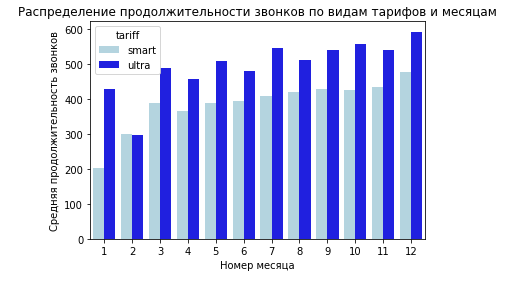

В среднем количество сообщений пользователи тарифа Ultra отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифак растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

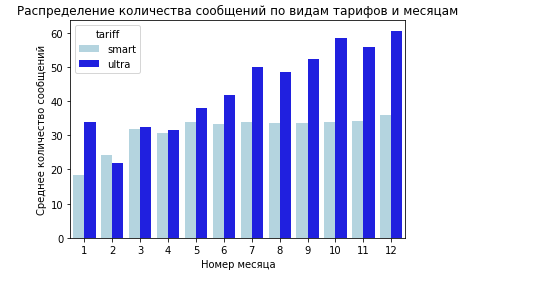

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

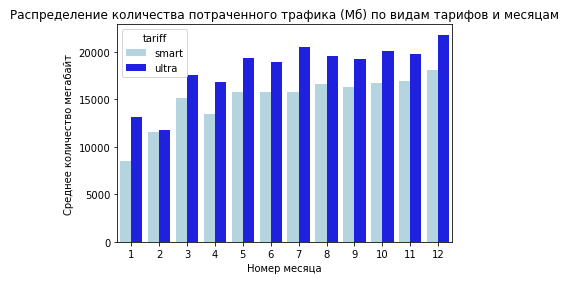

- Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются - является верной
- Гипотеза о том, что пользователи из Москвы приносят больше выручки, чем пользователи из других городов - является неверной